## Non-Positional Encodings for Third Variables

There are four major cases to consider when we want to plot three variables together:

1. Three numeric variables
2. two numeric variables and one categorical variable
3. one numeric variable and two categorical variables
4. three categorical variables

A numerical variable is a variable where the value has meaning (e.g., weight or age), but a value such as a phone number doesn't have meaning in the numbers alone. A categorical variable is a variable that holds a type (e.g., species or hair color).

If we have at least two numeric variables, as in the first two cases, one common method for depicting the data is by using a scatterplot to encode two of the numeric variables, then using a non-positional encoding on the points to convey the value on the third variable, whether numeric or categorical. (You will see additional techniques later in the lesson that can also be applied to the other two cases, i.e., where we have at least two categorical variables.)

Three main non-positional encodings stand out:

- marker color
- marker shape
- marker size

For Matplotlib and Seaborn, color is the easiest of these three encodings to apply for a third variable. Color can be used to encode both qualitative and quantitative data, with different types of color palettes used for different use cases. Because of how broadly color can be used, a dedicated discussion of color and its use in Matplotlib and Seaborn will be deferred to the next page in the lesson.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load dataset
df = pd.read_csv('../Data/fuel-econ.csv')

# create transmission type column
df['trans_type'] = df['trans'].apply(lambda x:x.split()[0])

np.random.seed(2018)
sample = np.random.choice(df.shape[0], 200, replace = False)
fuel_econ_subset = df.loc[sample]

### Encoding via Color

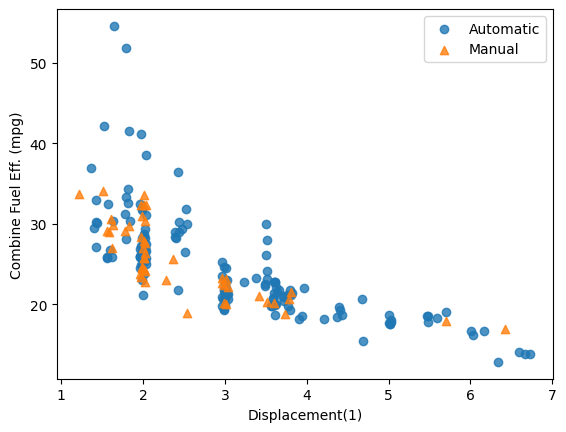

In [4]:
ttype_markers = [['Automatic', 'o'], 
                 ['Manual', '^']]

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sns.regplot(data=plot_data, x='displ', y='comb',
                x_jitter=0.04, fit_reg=False, marker=marker);
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');
plt.legend(['Automatic', 'Manual']);

### Encoding via Size

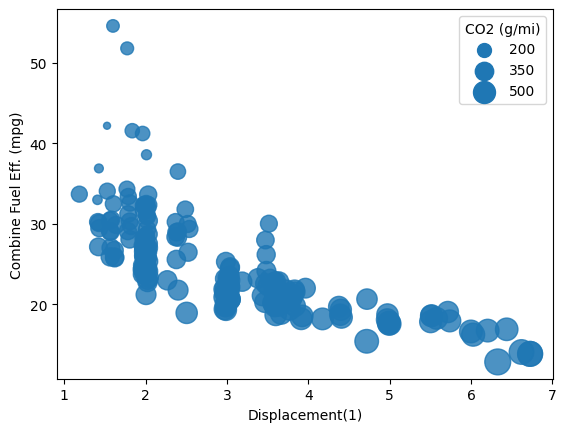

In [5]:
sns.regplot(data=fuel_econ_subset, x='displ', y='comb', 
           x_jitter=0.04, fit_reg=False, scatter_kws={'s': fuel_econ_subset['co2']/2});
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

sizes = [200, 350, 500]
legend_obj = []
for s in sizes: 
    legend_obj.append(plt.scatter([], [], s=s/2, color ='tab:blue'))
plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');

### Encoding via Shape

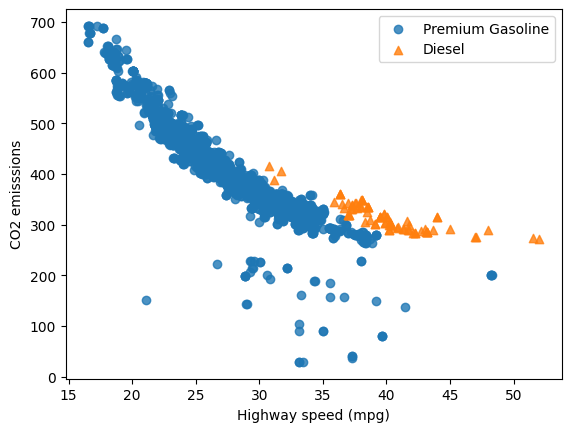

In [6]:
ttype_markers = [['Premium Gasoline', 'o'], 
                 ['Diesel', '^']]

for ttype, marker in ttype_markers:
    plot_data = df.loc[df['fuelType'] == ttype]
    sns.regplot(data=plot_data, x='highway', y='co2',
                x_jitter=0.04, fit_reg=False, marker=marker);
plt.xlabel('Highway speed (mpg)')
plt.ylabel('CO2 emisssions');
plt.legend(['Premium Gasoline', 'Diesel']);

### Encoding via Size

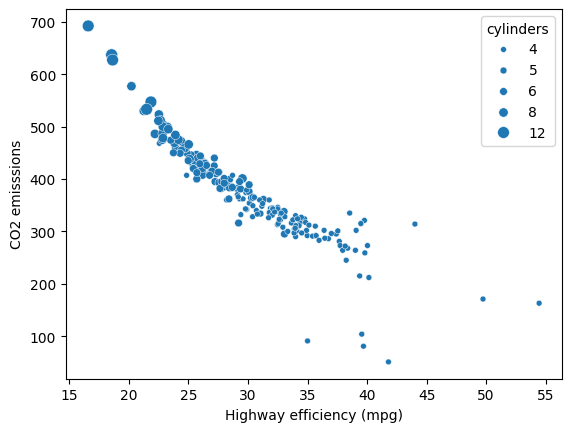

In [8]:
sns.scatterplot(data=fuel_econ_subset, x='highway', y='co2', size='cylinders', color='tab:blue')
plt.xlabel('Highway efficiency (mpg)')
plt.ylabel('CO2 emisssions');

A Warning on Combining Encodings

It might seem plausible to combine both size and shape encodings into the same plot, to depict the trend in four variables at once. This may be true but there are some cautions to be taken with this approach. One surface issue is that the code to depict the plot and a reasonable legend gets complicated. A more important issue is that point areas won't all be the same even with the same value, depending on the shape of the marker:

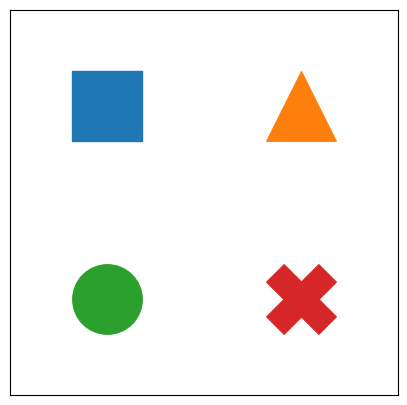

In [10]:
plt.figure(figsize = [5,5])

common_size = 2500
plt.scatter([0],[1], marker='s', s=common_size)
plt.scatter([1],[1], marker='^', s=common_size)
plt.scatter([0],[0], marker='o', s=common_size)
plt.scatter([1],[0], marker='X', s=common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5,1.5)
plt.xticks([])
plt.ylim(-0.5,1.5)
plt.yticks([]);

Despite having the same "s" values, the triangle, circle, and X markers all look smaller (have a smaller area) than the square. Perhaps this isn't a major concern, considering that size is better used as a qualitative measure for exploration. But it's still something to consider. A little more discussion of the number of variables that can be reasonably packed into a plot can be found later in the lesson ("How much is too much?").

https://matplotlib.org/stable/api/markers_api.html